# 01 - Data Exploration

Objective: explore the personal loan dataset, understand distributions, data quality, and relationships to inform downstream feature engineering and modeling.

Tasks covered:
- Load and inspect the dataset
- Statistical summaries for all features
- Distribution plots for numerical features
- Categorical frequency analysis
- Missing values and outlier checks
- Class balance inspection
- Correlation heatmap
- Document key findings


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme(style="whitegrid")

# Resolve project root whether the notebook is launched from repo root or notebooks/
PROJECT_ROOT = Path.cwd().resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

data_path = PROJECT_ROOT / "data" / "Dataset - 2526.csv"
fig_dir = PROJECT_ROOT / "results" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

data_path


PosixPath('/Users/ziadalwazzan/Documents/MSc/COMP0198-ML/ml-personal-loan-classification-models/data/Dataset - 2526.csv')

In [18]:
# Load data

df = pd.read_csv(data_path)

# Map defaults to binary for convenience in correlation analysis
if "previous_loan_defaults_on_file" in df.columns:
    df["previous_loan_defaults_on_file_flag"] = df["previous_loan_defaults_on_file"].map({"Yes": 1, "No": 0})

print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
df.head()


Shape: 45,000 rows x 17 columns


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,empl_len,ppl_household,loan_status,previous_loan_defaults_on_file_flag
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,0,3,1,0
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0,0,0,1
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,3,1,1,0
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,0,1,1,0
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1,0,1,0


In [10]:
# Data types and missing values

numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

missing = df.isna().sum()
missing_nonzero = missing[missing > 0]
print("\nMissing values (non-zero):")
missing_nonzero if not missing_nonzero.empty else print("None detected")


Numeric columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'empl_len', 'ppl_household', 'loan_status', 'previous_loan_defaults_on_file_flag']
Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Missing values (non-zero):
None detected


In [11]:
# Statistical summaries

num_summary = df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
num_summary


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
person_age,45000.0,27.764178,6.045108,20.00,21.00,22.00,24.00,26.00,30.00,39.00,48.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,17875.95,28366.70,47204.00,67048.00,95789.25,166754.70,271450.06,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,0.00,0.00,1.00,4.00,8.00,17.00,26.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,1138.87,2000.00,5000.00,8000.00,12237.25,24000.00,28390.34,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,5.42,6.17,8.59,11.01,12.99,16.00,18.25,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.02,0.03,0.07,0.12,0.19,0.31,0.40,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,2.00,2.00,3.00,4.00,8.00,14.00,17.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,497.00,539.00,601.00,640.00,670.00,703.00,724.00,850.00
empl_len,45000.0,5.410333,6.063532,0.00,0.00,0.00,1.00,4.00,8.00,17.00,26.00,125.00
ppl_household,45000.0,1.303956,1.140329,0.00,0.00,0.00,0.00,1.00,2.00,3.00,5.00,8.00


In [22]:
# Categorical feature frequencies

for col in categorical_cols:
    freq = df[col].value_counts()
    display(pd.DataFrame({"count": freq, "percent": (freq / len(df) * 100).round(2)}))


,count,percent
person_gender,,
male,24841,55.2
female,20159,44.8


,count,percent
person_education,,
Bachelor,13399,29.78
Associate,12028,26.73
High School,11972,26.60
Master,6980,15.51
Doctorate,621,1.38


,count,percent
person_home_ownership,,
RENT,23443,52.10
MORTGAGE,18489,41.09
OWN,2951,6.56
OTHER,117,0.26


,count,percent
loan_intent,,
EDUCATION,9153,20.34
MEDICAL,8548,19.00
VENTURE,7819,17.38
PERSONAL,7552,16.78
DEBTCONSOLIDATION,7145,15.88
HOMEIMPROVEMENT,4783,10.63


,count,percent
previous_loan_defaults_on_file,,
Yes,22858,50.8
No,22142,49.2


Counts:


,count
loan_status,
rejected,35000
approved,10000


Percenteges (%):


,proportion
loan_status,
rejected,77.78
approved,22.22


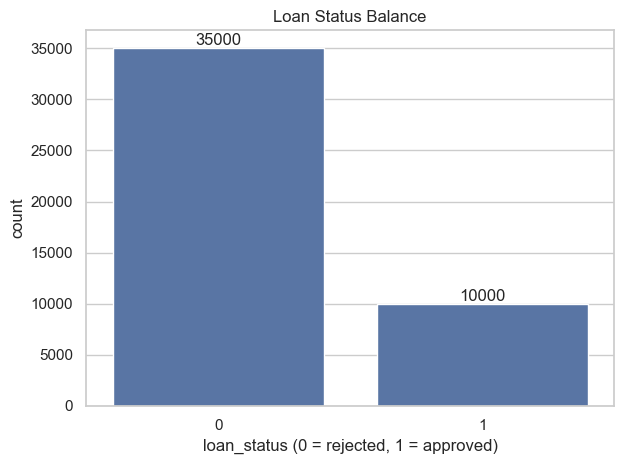

In [34]:
# Class balance

class_counts = df["loan_status"].value_counts().rename({0: "rejected", 1: "approved"})
class_pct = df["loan_status"].value_counts(normalize=True).mul(100).round(2).rename({0: "rejected", 1: "approved"})
print("Counts:")
display(pd.DataFrame(class_counts))
print("Percenteges (%):")
display(pd.DataFrame(class_pct))

ax = sns.countplot(x="loan_status", data=df)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("Loan Status Balance")
ax.set_xlabel("loan_status (0 = rejected, 1 = approved)")
plt.tight_layout()
plt.savefig(fig_dir / "class_balance_notebook.png", dpi=180)
plt.show()


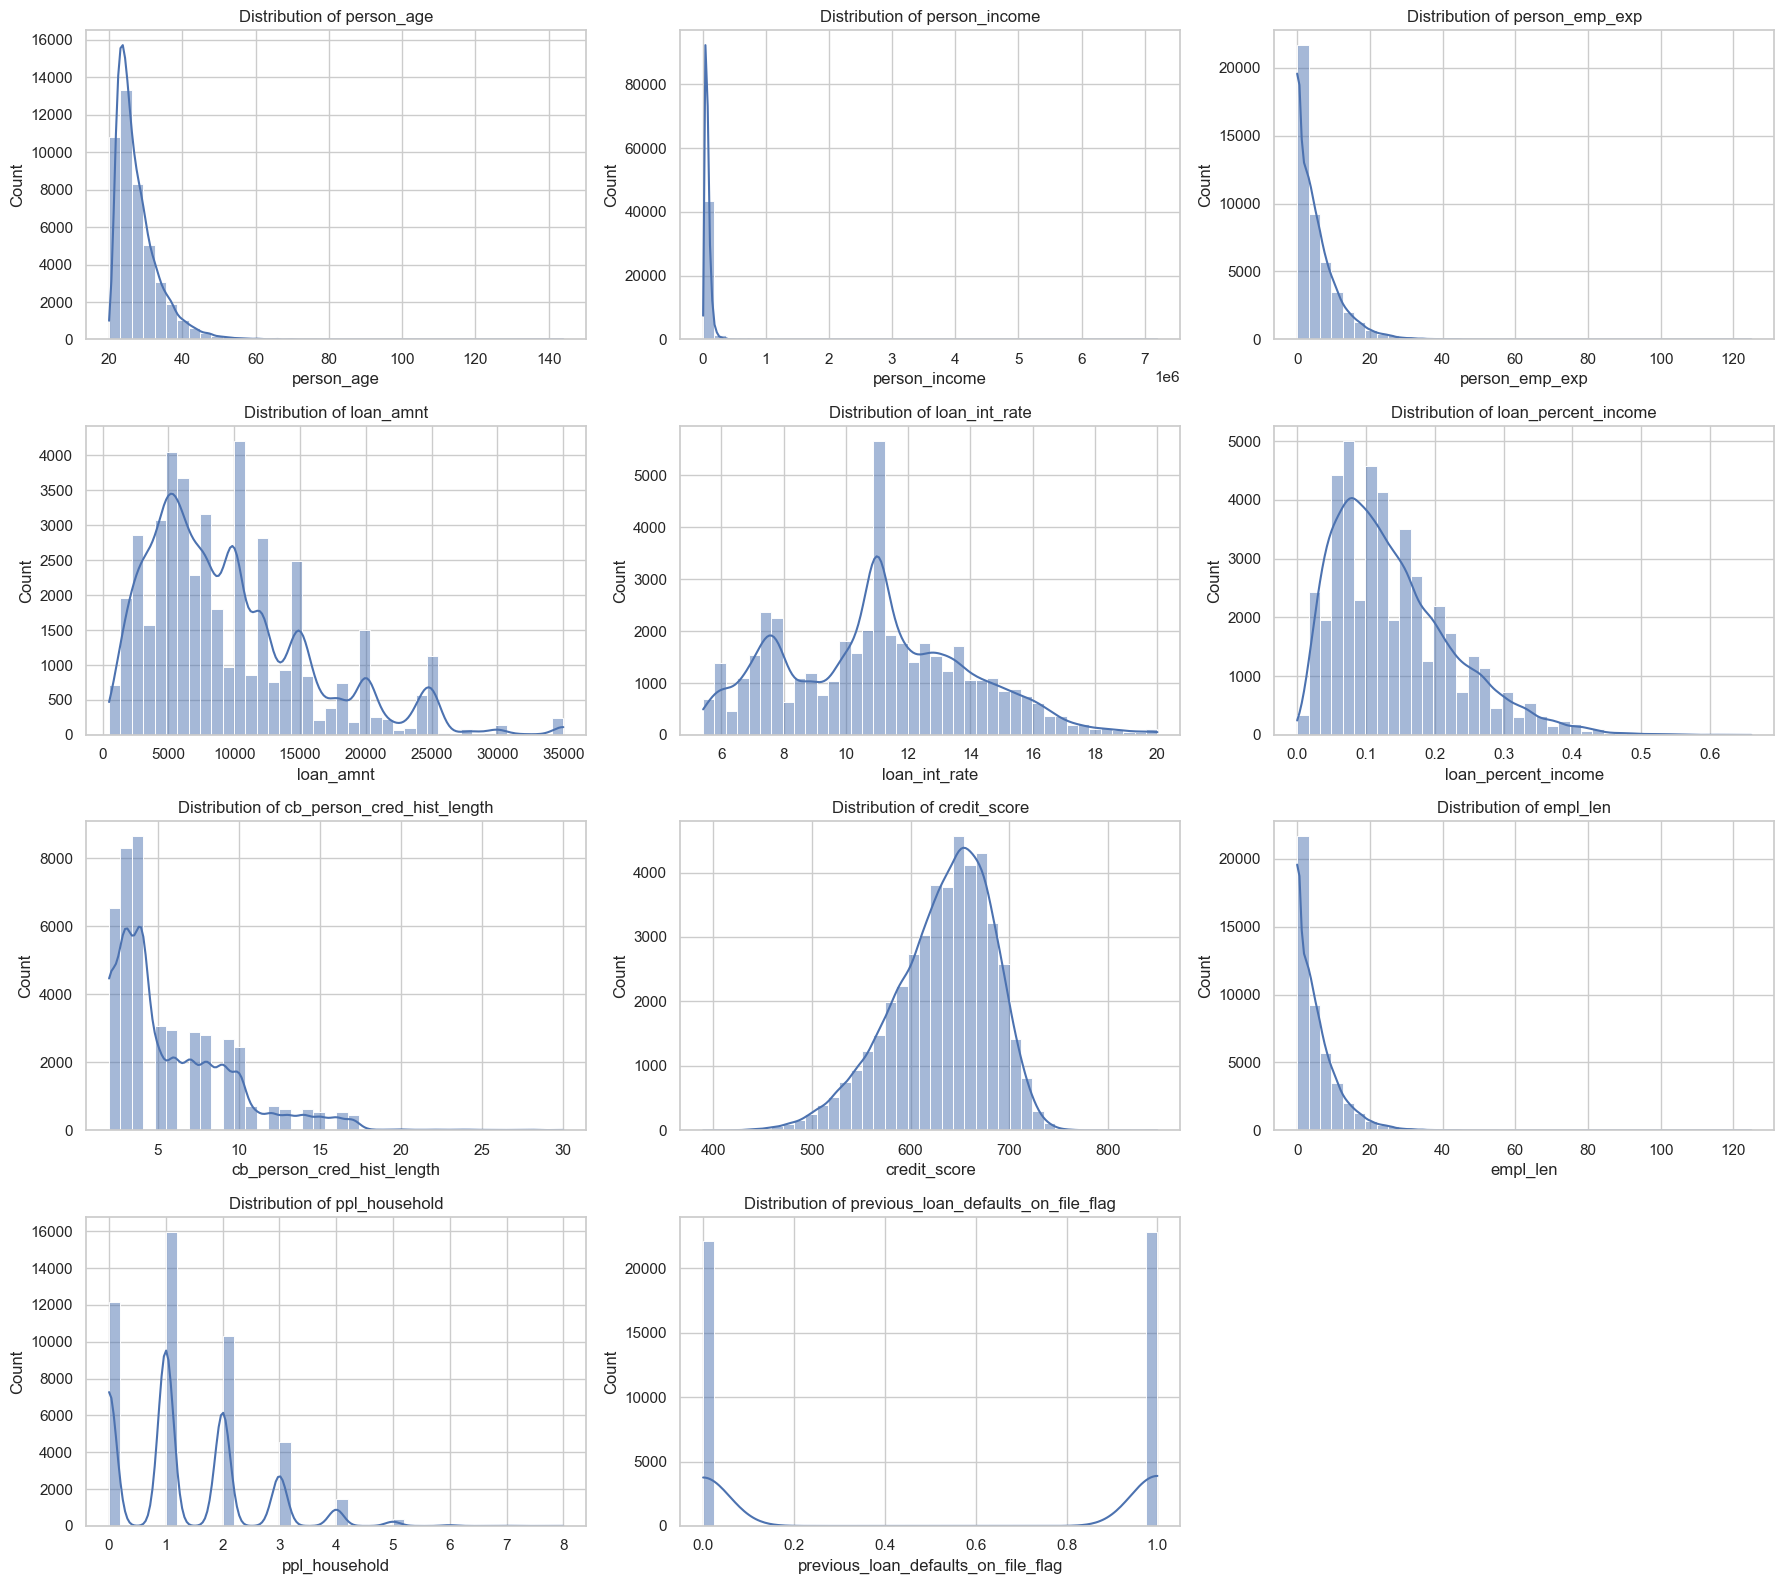

In [40]:
# Distribution plots for numerical features

# fetch numeric features without loan status boolean
num_features = [c for c in numeric_cols if c != "loan_status"]

# set up subplot grid distribtution
rows = int(np.ceil(len(num_features) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

# plot each feature's distribution plot
for ax, col in zip(axes, num_features):
    sns.histplot(df[col], bins=40, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Remove unused axes
for ax in axes[len(num_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig(fig_dir / "numeric_distributions_grid.png", dpi=180)
plt.show()


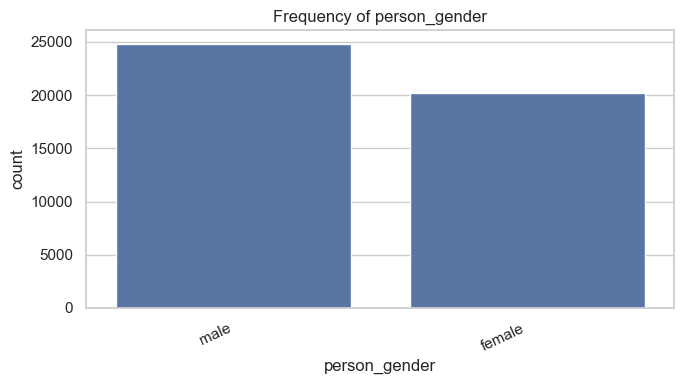

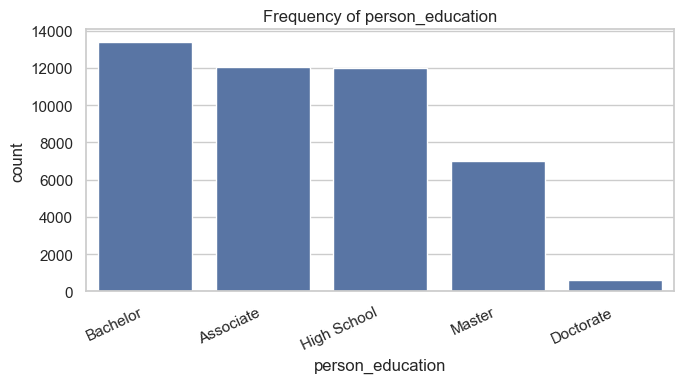

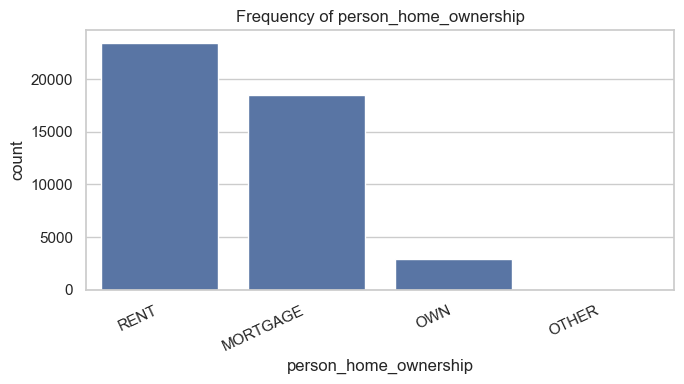

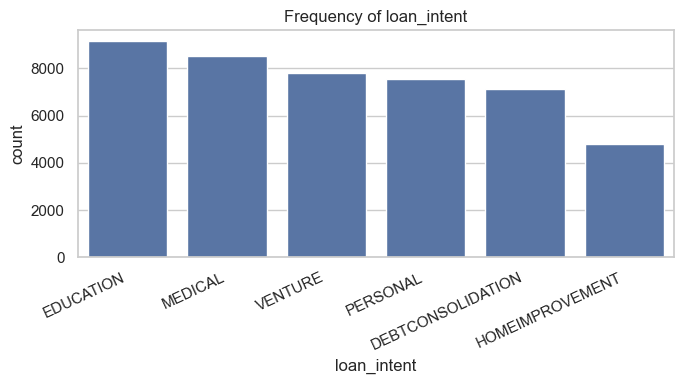

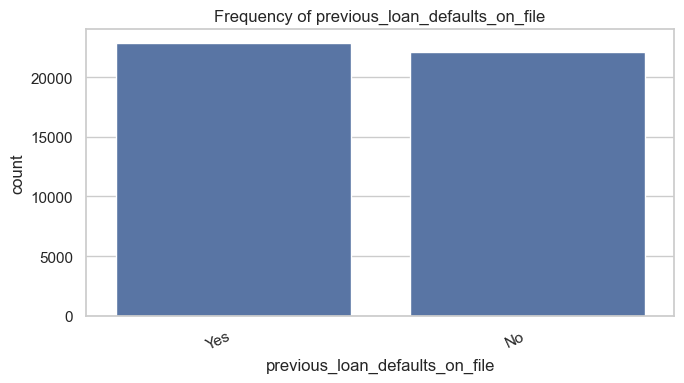

In [15]:
# Categorical frequency plots

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.xticks(rotation=25, ha="right")
    plt.title(f"Frequency of {col}")
    plt.tight_layout()
    plt.savefig(fig_dir / f"freq_{col}_notebook.png", dpi=180)
    plt.show()


In [16]:
# Outlier check using IQR rule

outlier_records = []
for col in num_features:  # exclude target to avoid trivial flagging
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_records.append(
        {
            "feature": col,
            "count": int(mask.sum()),
            "percent": round(mask.mean() * 100, 2),
            "lower_bound": round(lower, 2),
            "upper_bound": round(upper, 2),
        }
    )

outlier_df = pd.DataFrame(outlier_records).sort_values("percent", ascending=False)
outlier_df


,feature,count,percent,lower_bound,upper_bound
3,loan_amnt,2348,5.22,-5855.88,23093.12
1,person_income,2218,4.93,-25673.88,168667.12
0,person_age,2188,4.86,15.00,39.00
2,person_emp_exp,1724,3.83,-9.50,18.50
8,empl_len,1724,3.83,-9.50,18.50
6,cb_person_cred_hist_length,1366,3.04,-4.50,15.50
5,loan_percent_income,744,1.65,-0.11,0.37
7,credit_score,467,1.04,497.50,773.50
4,loan_int_rate,124,0.28,1.99,19.59
9,ppl_household,90,0.20,-3.00,5.00


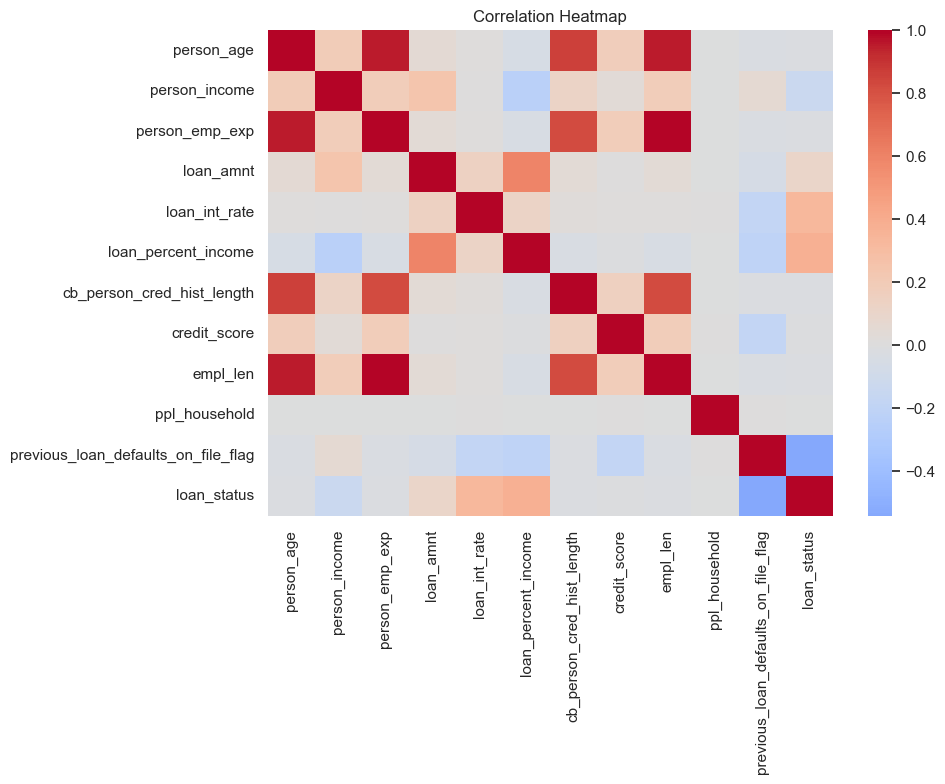

loan_status                            1.000000
loan_percent_income                    0.384880
loan_int_rate                          0.332005
loan_amnt                              0.107714
ppl_household                         -0.003870
credit_score                          -0.007647
cb_person_cred_hist_length            -0.014851
person_emp_exp                        -0.020481
empl_len                              -0.020481
person_age                            -0.021476
person_income                         -0.135808
previous_loan_defaults_on_file_flag   -0.543096
Name: loan_status, dtype: float64

In [17]:
# Correlation heatmap (numeric features + target)

corr_cols = num_features + ["loan_status"]
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(fig_dir / "correlation_heatmap_notebook.png", dpi=200)
plt.show()

# Correlation strength with target
corr_to_target = corr_matrix["loan_status"].sort_values(ascending=False)
corr_to_target


### Findings (initial)

- **Shape & quality:** 45,000 rows / 16 columns; no missing values detected.
- **Class balance:** Imbalanced with approvals at 22.2% and rejections at 77.8%; will need stratification and/or balancing later.
- **Numeric distributions:**
  - Age centered ~27.8 years (min 20, max 144) with a small high-age tail to 144 (likely erroneous).
  - Income highly right-skewed (mean ~80k, max 7.2M); consider capping/log-transform.
  - Loan amounts average ~9.6k (max 35k); loan_percent_income mean 0.14 (max 0.66).
  - Interest rates range 5.4–20% (mean ~11%); credit scores mean ~633 spanning 390–850.
- **Categorical frequencies:**
  - Gender: ~55% male, 45% female.
  - Education: Bachelor/Associate/High School dominate (~84% combined); Master ~16%; Doctorate <2%.
  - Home ownership: Rent 52%, Mortgage 41%, Own 7%, Other <1%.
  - Loan intent: Education (20%), Medical (19%), Venture (17%), Personal (17%), Debt Consolidation (16%), others minimal.
  - Previous defaults: Yes 50.8%, No 49.2%.
- **Outliers (IQR rule, % of rows):** loan_amnt ~5.2%, person_income ~4.9% (driven by extreme incomes), person_age ~4.9%, person_emp_exp ~3.8%. Age 144 and multi-million incomes warrant inspection/capping.
- **Correlations with target (loan_status):** strongest negative `previous_loan_defaults_on_file_flag` (-0.54) and `person_income` (-0.14); strongest positive `loan_percent_income` (0.38), `loan_int_rate` (0.33), `loan_amnt` (0.11). Other features show weak linear correlation.

Artifacts saved under `results/figures/` and numeric summaries under `results/` for reuse.
